#Statistics and Inference

#1 : What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

:- Type I	False Positive — rejecting H₀ when it’s true	Approving a useless drug	Incorrect action, wasted resources

Impact: You think there is an effect when actually there isn’t.

Type II	False Negative — failing to reject H₀ when it’s false	Missing a real disease	Missed opportunities, delays

Impact: You miss a real effect that actually exists.


#2:What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

:- P-value:
The probability of getting the observed results (or more extreme) if the null hypothesis is true.

Interpretation:

Low P-value (< α): Strong evidence against the null hypothesis → reject H₀.

High P-value (> α): Not enough evidence to reject H₀ → fail to reject H₀.

#3:Explain the difference between a Z-test and a T-test, including when to use  each.


:- Key Difference

Z-test: Uses population SD

T-test: Uses sample SD

Z-test → large samples or known

T-test → small samples or unknown

# 4:What is a confidence interval, and how does the margin of error influence its width and interpretation?


:- Confidence Interval

A range of values that is likely to contain the true population parameter (like mean or proportion) with a certain level of confidence
Margin of Error

The amount added and subtracted from the sample estimate to create the interval.

Larger margin of error → wider confidence interval (less precise).

Smaller margin of error → narrower confidence interval (more precise).

Interpretation

A 95% confidence interval means:
If you repeated the study many times, 95% of the intervals would contain the true value.

#5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

:- Assumptions

Normality: Data in each group should be approximately normal.

Equal variances (homogeneity): All groups should have similar variances.

Independence: Observations must be independent of each other.

How it extends hypothesis testing

Instead of doing multiple t-tests between pairs of groups

ANOVA tests all group means at once using one overall test.

#6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.

:- If p-value < α (0.05) → Reject H₀
The sample mean is significantly different from the population mean.

If p-value > α → Fail to reject H₀
There is no strong evidence that the sample mean differs from the population mean.

# 7:Simulate a dataset from a binomial distribution (n = 10, p = 0.5) usin NumPy and plot the histogram.

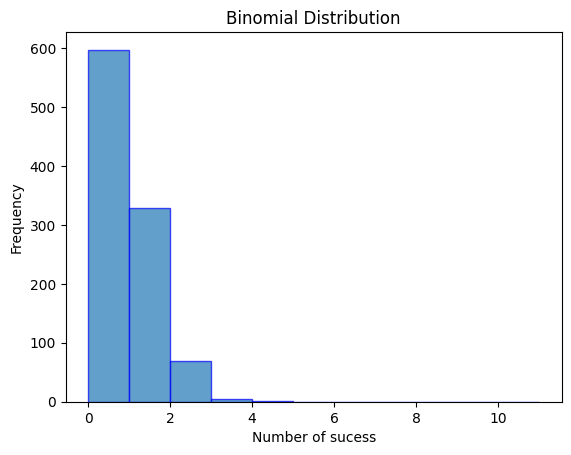

In [2]:


import numpy as np
import matplotlib.pyplot as plt

n = 10
p = 0.05
size = 1000

data  = np.random.binomial(n, p, size)

plt.hist(data, bins=range(n+2), edgecolor="blue" , alpha=0.7)
plt.title("Binomial Distribution")
plt.xlabel("Number of sucess")
plt.ylabel("Frequency")
plt.show()


#8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

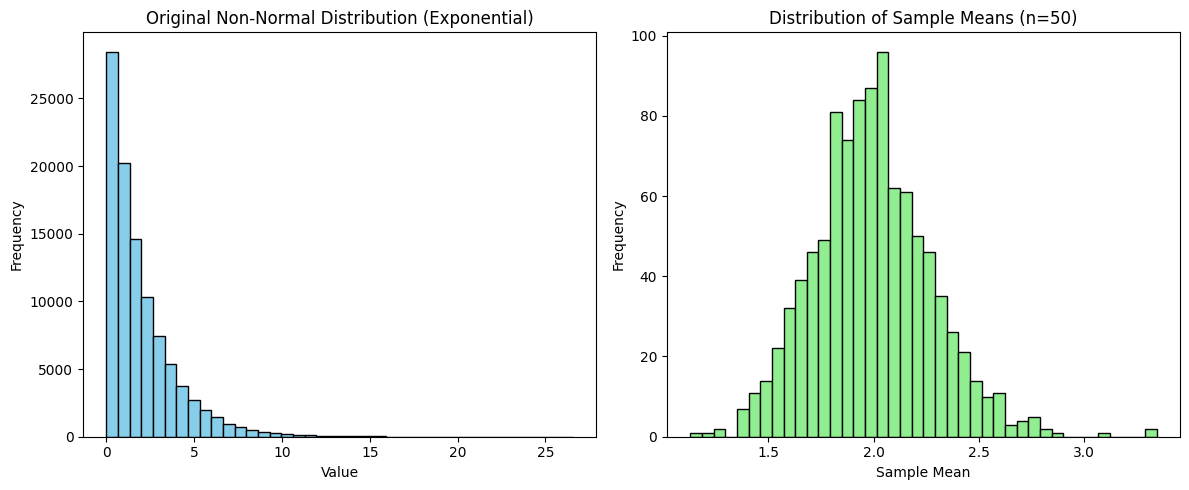

In [3]:
import numpy as np
import matplotlib.pyplot as plt

population = np.random.exponential(scale=2, size=100000)  # mean=2

sample_size = 50   # number of observations per sample
num_samples = 1000  # number of samples

sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

plt.figure(figsize=(12,5))

# Plot population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins=40, color='skyblue', edgecolor='black')
plt.title('Original Non-Normal Distribution (Exponential)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot sampling distribution of means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=40, color='lightgreen', edgecolor='black')
plt.title(f'Distribution of Sample Means (n={sample_size})')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#9: Write a Python function to calculate and visualize the confidence interval for a sample mean.

Sample Mean: 48.12
95% Confidence Interval: (44.76, 51.48)


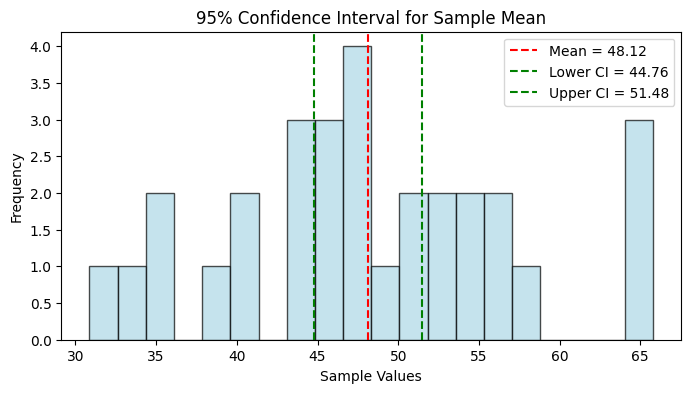

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def confidence_interval(data, confidence=0.95):
    """
    Calculate and visualize the confidence interval for a sample mean.

    Parameters:
        data (array-like): Sample data
        confidence (float): Confidence level (default 0.95)
    """

    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)  # Standard error of mean

    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_value * std_err


    lower = mean - margin_of_error
    upper = mean + margin_of_error


    print(f"Sample Mean: {mean:.2f}")
    print(f"{int(confidence*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f})")

    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.2f}")
    plt.axvline(lower, color='green', linestyle='--', label=f"Lower CI = {lower:.2f}")
    plt.axvline(upper, color='green', linestyle='--', label=f"Upper CI = {upper:.2f}")
    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.xlabel("Sample Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

np.random.seed(42)
sample_data = np.random.normal(loc=50, scale=10, size=30)
confidence_interval(sample_data, confidence=0.95)

#10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

Chi-square Statistic: 1.000
P-value: 0.9626
✅ Fail to reject the null hypothesis — the distribution fits well (die is fair).


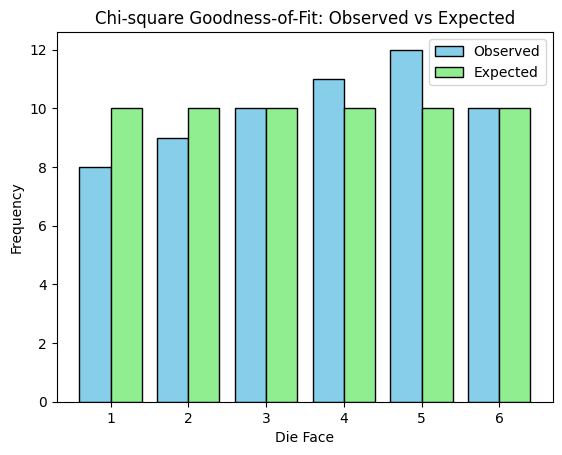

In [7]:
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

observed = np.array([8, 9, 10, 11, 12, 10])  # observed counts for faces 1–6


expected = np.array([10, 10, 10, 10, 10, 10])  # equal expected frequency (60 rolls / 6 faces)


chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic: {chi_stat:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("❌ Reject the null hypothesis — the distribution does NOT fit (die may be biased).")
else:
    print("✅ Fail to reject the null hypothesis — the distribution fits well (die is fair).")


faces = np.arange(1, 7)
plt.bar(faces - 0.2, observed, width=0.4, label='Observed', color='skyblue', edgecolor='black')
plt.bar(faces + 0.2, expected, width=0.4, label='Expected', color='lightgreen', edgecolor='black')
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Chi-square Goodness-of-Fit: Observed vs Expected')
plt.legend()
plt.show()